<a href="https://colab.research.google.com/github/MohammedRSaad/Osteoporosis-indecator/blob/main/MLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries**

In [520]:
import pandas as pd
import numpy as np

from pandas_profiling import ProfileReport

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn import preprocessing

import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics

# **Importing the data**

#### **Columns used in for the dataset**

In [522]:
columns = ['SEQN', 'BMXWT', 'BMXHT', 'BMXBMI', 'BPQ020', 'BPQ080', 'PEASCST1',\
           'PEASCTM1', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH3', 'DIQ010', 'KIQ022',\
           'KIQ026', 'MGQ070', 'MGQ100', 'MGXH1T1', 'MGXH1T1E', 'MGXH2T1',\
           'MGXH2T1E', 'MGXH1T2', 'MGXH1T2E', 'MGXH2T2', 'MGXH2T2E', 'MGXH1T3',\
           'MGXH1T3E', 'MGXH2T3', 'MGXH2T3E', 'MGDCGSZ', 'DXXLABMC', 'DXXLABMD',\
           'DXXRABMC', 'DXXRABMD', 'DXDTOBMC', 'DXDTOBMD']

#### **Connecting Google Colab with Google Drive to get the data**

In [488]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### **NHANES 2011-2012 data:**

In [489]:
body_measures_11 = pd.read_csv("/content/drive/MyDrive/IsefData/2011-2012/BMX_G.csv").drop_duplicates(subset=['SEQN'])
blood_pressure_Q_11 = pd.read_csv("/content/drive/MyDrive/IsefData/2011-2012/BPQ_G.csv").drop_duplicates(subset=['SEQN'])
blood_pressure_X_11 = pd.read_csv("/content/drive/MyDrive/IsefData/2011-2012/BPX_G.csv").drop_duplicates(subset=['SEQN'])
demographic_data_11 = pd.read_csv("/content/drive/MyDrive/IsefData/2011-2012/DEMO_G.csv").drop_duplicates(subset=['SEQN'])
diabetes_11 = pd.read_csv("/content/drive/MyDrive/IsefData/2011-2012/DIQ_G.csv").drop_duplicates(subset=['SEQN'])
kidney_11 = pd.read_csv("/content/drive/MyDrive/IsefData/2011-2012/KIQ_U_G.csv").drop_duplicates(subset=['SEQN'])
muscle_strength_11 = pd.read_csv("/content/drive/MyDrive/IsefData/2011-2012/MGX_G.csv").drop_duplicates(subset=['SEQN'])
bone_prameters_11 = pd.read_csv("/content/drive/MyDrive/IsefData/2011-2012/DXX_G.csv").drop_duplicates(subset=['SEQN'])

#### **NHANES 2013-2012 data:**

In [490]:
body_measures_13 = pd.read_csv("/content/drive/MyDrive/IsefData/2013-2014/BMX_H.csv").drop_duplicates(subset=['SEQN'])
blood_pressure_Q_13 = pd.read_csv("/content/drive/MyDrive/IsefData/2013-2014/BPQ_H.csv").drop_duplicates(subset=['SEQN'])
blood_pressure_X_13 = pd.read_csv("/content/drive/MyDrive/IsefData/2013-2014/BPX_H.csv").drop_duplicates(subset=['SEQN'])
demographic_data_13 = pd.read_csv("/content/drive/MyDrive/IsefData/2013-2014/DEMO_H.csv").drop_duplicates(subset=['SEQN'])
diabetes_13 = pd.read_csv("/content/drive/MyDrive/IsefData/2013-2014/DIQ_H.csv").drop_duplicates(subset=['SEQN'])
kidney_13 = pd.read_csv("/content/drive/MyDrive/IsefData/2013-2014/KIQ_U_H.csv").drop_duplicates(subset=['SEQN'])
muscle_strength_13 = pd.read_csv("/content/drive/MyDrive/IsefData/2013-2014/MGX_H.csv").drop_duplicates(subset=['SEQN'])
bone_prameters_13 = pd.read_csv("/content/drive/MyDrive/IsefData/2013-2014/DXX_H.csv").drop_duplicates(subset=['SEQN'])

# **Data Cleaning** 

#### **Merging data**

In [491]:
datasets_11 = [body_measures_11, blood_pressure_Q_11, blood_pressure_X_11, demographic_data_11, diabetes_11, kidney_11, muscle_strength_11, bone_prameters_11]
df_11 = pd.concat([df.set_index(['SEQN']) for df in datasets_11], axis=1)
df_11.reset_index(inplace=True)
df_11

,SEQN,BMXWT,BMXHT,BMXBMI,BPQ020,BPQ080,PEASCST1,PEASCTM1,RIAGENDR,RIDAGEYR,...,MGXH1T3E,MGXH2T3,MGXH2T3E,MGDCGSZ,DXXLABMC,DXXLABMD,DXXRABMC,DXXRABMD,DXDTOBMC,DXDTOBMD
0,62161,69.2,172.3,23.3,2.0,2.0,1.0,596.0,1,22,...,1.0,34.9,1.0,69.3,191.80,0.832,193.86,0.843,2588.63,1.213
1,62162,12.7,94.7,14.2,NaN,NaN,1.0,64.0,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,62163,49.4,168.9,17.3,NaN,NaN,1.0,788.0,1,14,...,1.0,29.4,1.0,71.0,129.83,0.711,145.72,0.748,1931.41,1.016
3,62164,67.2,170.1,23.2,2.0,2.0,1.0,527.0,2,44,...,1.0,37.4,1.0,75.8,138.59,0.662,149.31,0.691,2038.72,1.075
4,62165,69.1,159.4,27.2,NaN,NaN,1.0,468.0,2,14,...,1.0,25.0,1.0,50.5,126.29,0.668,125.20,0.658,1943.51,1.058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9751,71912,87.8,177.3,27.9,2.0,2.0,1.0,609.0,1,40,...,1.0,44.3,1.0,93.9,236.26,0.842,238.32,0.888,2421.32,1.088
9752,71913,56.5,161.6,21.6,2.0,NaN,1.0,609.0,2,18,...,1.0,29.1,1.0,59.0,144.29,0.696,157.22,0.753,1976.22,1.053
9753,71914,32.3,148.1,14.7,NaN,NaN,1.0,633.0,2,10,...,1.0,18.5,1.0,37.0,85.93,0.560,84.59,0.566,1218.31,0.799
9754,71915,78.4,168.8,27.5,2.0,1.0,1.0,1058.0,1,60,...,1.0,22.0,1.0,55.5,NaN,NaN,NaN,NaN,NaN,NaN


In [492]:
datasets_13 = [body_measures_13, blood_pressure_Q_13, blood_pressure_X_13, demographic_data_13, diabetes_13, kidney_13, muscle_strength_13, bone_prameters_13]
df_13 = pd.concat([df.set_index(['SEQN']) for df in datasets_13], axis=1)
df_13.reset_index(inplace=True)
df_13

,SEQN,BMXWT,BMXHT,BMXBMI,BPQ020,BPQ080,PEASCST1,PEASCTM1,RIAGENDR,RIDAGEYR,...,MGXH1T3E,MGXH2T3,MGXH2T3E,MGDCGSZ,DXXLABMC,DXXLABMD,DXXRABMC,DXXRABMD,DXDTOBMC,DXDTOBMD
0,73557.0,78.3,171.3,26.7,1.0,1.0,1.0,620.0,1.0,69.0,...,1.0,33.4,1.0,55.2,NaN,NaN,NaN,NaN,NaN,NaN
1,73558.0,89.5,176.8,28.6,1.0,1.0,1.0,766.0,1.0,54.0,...,1.0,22.5,1.0,61.5,198.48,0.800,213.60,0.816,2276.24,1.024
2,73559.0,88.9,175.3,28.9,1.0,1.0,1.0,665.0,1.0,72.0,...,1.0,46.9,1.0,91.0,NaN,NaN,NaN,NaN,NaN,NaN
3,73560.0,32.2,137.3,17.1,NaN,NaN,1.0,803.0,1.0,9.0,...,1.0,17.9,1.0,32.2,56.28,0.554,62.14,0.610,1127.39,0.856
4,73561.0,52.0,162.4,19.7,1.0,2.0,1.0,949.0,2.0,73.0,...,1.0,17.8,1.0,30.9,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10171,83728.0,11.3,84.4,15.9,NaN,NaN,1.0,124.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10172,83729.0,89.6,162.3,34.0,2.0,2.0,1.0,679.0,NaN,NaN,...,1.0,20.0,1.0,46.6,140.19,0.697,162.25,0.713,2112.83,1.110
10173,83730.0,22.8,119.1,16.1,NaN,NaN,1.0,381.0,NaN,NaN,...,1.0,8.4,1.0,20.8,NaN,NaN,NaN,NaN,NaN,NaN
10174,83731.0,42.3,148.1,19.3,NaN,NaN,1.0,498.0,NaN,NaN,...,1.0,19.5,1.0,36.0,80.89,0.610,81.89,0.606,1265.84,0.906


In [493]:
df = pd.concat([df_11, df_13]).reset_index(drop=True)
df

,SEQN,BMXWT,BMXHT,BMXBMI,BPQ020,BPQ080,PEASCST1,PEASCTM1,RIAGENDR,RIDAGEYR,...,MGXH1T3E,MGXH2T3,MGXH2T3E,MGDCGSZ,DXXLABMC,DXXLABMD,DXXRABMC,DXXRABMD,DXDTOBMC,DXDTOBMD
0,62161.0,69.2,172.3,23.3,2.0,2.0,1.0,596.0,1.0,22.0,...,1.0,34.9,1.0,69.3,191.80,0.832,193.86,0.843,2588.63,1.213
1,62162.0,12.7,94.7,14.2,NaN,NaN,1.0,64.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,62163.0,49.4,168.9,17.3,NaN,NaN,1.0,788.0,1.0,14.0,...,1.0,29.4,1.0,71.0,129.83,0.711,145.72,0.748,1931.41,1.016
3,62164.0,67.2,170.1,23.2,2.0,2.0,1.0,527.0,2.0,44.0,...,1.0,37.4,1.0,75.8,138.59,0.662,149.31,0.691,2038.72,1.075
4,62165.0,69.1,159.4,27.2,NaN,NaN,1.0,468.0,2.0,14.0,...,1.0,25.0,1.0,50.5,126.29,0.668,125.20,0.658,1943.51,1.058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19927,83728.0,11.3,84.4,15.9,NaN,NaN,1.0,124.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19928,83729.0,89.6,162.3,34.0,2.0,2.0,1.0,679.0,NaN,NaN,...,1.0,20.0,1.0,46.6,140.19,0.697,162.25,0.713,2112.83,1.110
19929,83730.0,22.8,119.1,16.1,NaN,NaN,1.0,381.0,NaN,NaN,...,1.0,8.4,1.0,20.8,NaN,NaN,NaN,NaN,NaN,NaN
19930,83731.0,42.3,148.1,19.3,NaN,NaN,1.0,498.0,NaN,NaN,...,1.0,19.5,1.0,36.0,80.89,0.610,81.89,0.606,1265.84,0.906


#### **Data cleaning**

In [494]:
df.dropna(inplace=True)
df = df[df['RIDAGEYR'] > 15]
df.reset_index(inplace=True, drop=True)
df

,SEQN,BMXWT,BMXHT,BMXBMI,BPQ020,BPQ080,PEASCST1,PEASCTM1,RIAGENDR,RIDAGEYR,...,MGXH1T3E,MGXH2T3,MGXH2T3E,MGDCGSZ,DXXLABMC,DXXLABMD,DXXRABMC,DXXRABMD,DXDTOBMC,DXDTOBMD
0,62161.0,69.2,172.3,23.3,2.0,2.0,1.0,596.0,1.0,22.0,...,1.0,34.9,1.0,69.3,191.80,0.832,193.86,0.843,2588.63,1.213
1,62164.0,67.2,170.1,23.2,2.0,2.0,1.0,527.0,2.0,44.0,...,1.0,37.4,1.0,75.8,138.59,0.662,149.31,0.691,2038.72,1.075
2,62169.0,54.6,164.8,20.1,2.0,2.0,1.0,1005.0,1.0,21.0,...,1.0,35.7,1.0,86.5,151.45,0.782,171.93,0.812,2024.57,1.091
3,62172.0,98.6,172.0,33.3,2.0,2.0,1.0,515.0,2.0,43.0,...,1.0,35.2,1.0,69.6,189.26,0.723,199.91,0.715,2460.49,1.065
4,62179.0,91.4,182.1,27.6,2.0,2.0,1.0,815.0,1.0,55.0,...,1.0,52.9,1.0,115.4,234.46,0.804,241.37,0.827,2682.80,1.095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5338,83540.0,74.0,166.0,26.9,2.0,2.0,1.0,610.0,1.0,30.0,...,1.0,16.3,1.0,36.1,198.30,0.861,213.45,0.897,2716.18,1.284
5339,83541.0,72.1,163.1,27.1,2.0,2.0,1.0,886.0,1.0,44.0,...,1.0,25.4,1.0,62.9,189.69,0.855,207.89,0.900,2532.22,1.275
5340,83546.0,90.7,185.5,26.4,2.0,2.0,1.0,644.0,1.0,59.0,...,1.0,50.6,1.0,106.6,241.94,0.909,272.40,0.933,3380.93,1.369
5341,83554.0,89.3,169.0,31.3,2.0,2.0,1.0,699.0,1.0,49.0,...,1.0,35.3,1.0,74.2,225.08,0.871,236.01,0.902,2889.10,1.296


# **Data Analysis** 

#### **Data report**

In [495]:
#pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [496]:
#profile = ProfileReport(df, title="Pandas Profiling Report")
#profile.to_file("your_report.html")

In [497]:
#profile

#### **Creating new column for having ostoeporosis**

In [498]:
BMD_mean = df['DXXLABMD'].mean()
print(f'mean: {BMD_mean}')
BMD_std = df['DXXLABMD'].std()
print(f'std: {BMD_std}')

have_disease = pd.DataFrame(((df['DXXLABMD'] - BMD_mean)/ BMD_std < -1).tolist(), columns=['have_disease'])
df = pd.concat([df, have_disease], axis=1)
df

mean: 0.7760902114916712
std: 0.09596875907148193


,SEQN,BMXWT,BMXHT,BMXBMI,BPQ020,BPQ080,PEASCST1,PEASCTM1,RIAGENDR,RIDAGEYR,...,MGXH2T3,MGXH2T3E,MGDCGSZ,DXXLABMC,DXXLABMD,DXXRABMC,DXXRABMD,DXDTOBMC,DXDTOBMD,have_disease
0,62161.0,69.2,172.3,23.3,2.0,2.0,1.0,596.0,1.0,22.0,...,34.9,1.0,69.3,191.80,0.832,193.86,0.843,2588.63,1.213,False
1,62164.0,67.2,170.1,23.2,2.0,2.0,1.0,527.0,2.0,44.0,...,37.4,1.0,75.8,138.59,0.662,149.31,0.691,2038.72,1.075,True
2,62169.0,54.6,164.8,20.1,2.0,2.0,1.0,1005.0,1.0,21.0,...,35.7,1.0,86.5,151.45,0.782,171.93,0.812,2024.57,1.091,False
3,62172.0,98.6,172.0,33.3,2.0,2.0,1.0,515.0,2.0,43.0,...,35.2,1.0,69.6,189.26,0.723,199.91,0.715,2460.49,1.065,False
4,62179.0,91.4,182.1,27.6,2.0,2.0,1.0,815.0,1.0,55.0,...,52.9,1.0,115.4,234.46,0.804,241.37,0.827,2682.80,1.095,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5338,83540.0,74.0,166.0,26.9,2.0,2.0,1.0,610.0,1.0,30.0,...,16.3,1.0,36.1,198.30,0.861,213.45,0.897,2716.18,1.284,False
5339,83541.0,72.1,163.1,27.1,2.0,2.0,1.0,886.0,1.0,44.0,...,25.4,1.0,62.9,189.69,0.855,207.89,0.900,2532.22,1.275,False
5340,83546.0,90.7,185.5,26.4,2.0,2.0,1.0,644.0,1.0,59.0,...,50.6,1.0,106.6,241.94,0.909,272.40,0.933,3380.93,1.369,False
5341,83554.0,89.3,169.0,31.3,2.0,2.0,1.0,699.0,1.0,49.0,...,35.3,1.0,74.2,225.08,0.871,236.01,0.902,2889.10,1.296,False


#### **Setting X and y datasets**

In [499]:
data = df.drop(['SEQN', 'DXXLABMC', 'DXXLABMD', 'DXXRABMC', 'DXXRABMD', 'DXDTOBMC', 'DXDTOBMD'], axis=1)
data = pd.concat([data[data['have_disease'] == True], data[data['have_disease'] == False].sample(900)]).sample(frac=1).reset_index(drop=True)
data

,BMXWT,BMXHT,BMXBMI,BPQ020,BPQ080,PEASCST1,PEASCTM1,RIAGENDR,RIDAGEYR,RIDRETH3,...,MGXH1T2,MGXH1T2E,MGXH2T2,MGXH2T2E,MGXH1T3,MGXH1T3E,MGXH2T3,MGXH2T3E,MGDCGSZ,have_disease
0,96.4,186.3,27.8,2.0,2.0,1.0,705.0,1.0,36.0,3.0,...,48.5,1.0,41.0,1.0,44.4,1.0,45.1,1.0,93.6,False
1,101.8,162.8,38.4,2.0,2.0,1.0,589.0,2.0,56.0,3.0,...,32.4,1.0,33.6,1.0,32.6,1.0,31.3,1.0,66.2,False
2,67.9,178.7,21.3,2.0,2.0,1.0,717.0,1.0,53.0,3.0,...,52.4,1.0,63.0,1.0,54.4,1.0,57.1,1.0,117.4,False
3,81.2,165.0,29.8,1.0,1.0,1.0,611.0,1.0,47.0,4.0,...,44.6,1.0,45.4,1.0,41.8,1.0,43.4,1.0,90.0,False
4,106.3,174.7,34.8,2.0,2.0,1.0,825.0,1.0,33.0,1.0,...,53.4,1.0,51.9,1.0,52.1,1.0,50.7,1.0,105.3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1783,84.3,178.0,26.6,2.0,2.0,1.0,620.0,1.0,31.0,3.0,...,59.0,1.0,55.4,1.0,56.5,1.0,55.4,1.0,118.9,False
1784,52.9,159.1,20.9,2.0,2.0,1.0,546.0,2.0,39.0,6.0,...,25.3,1.0,25.7,1.0,29.4,1.0,26.8,1.0,56.2,True
1785,66.0,163.8,24.6,1.0,1.0,1.0,678.0,2.0,59.0,3.0,...,25.2,1.0,27.3,1.0,26.6,1.0,27.9,1.0,54.5,True
1786,78.9,170.5,27.1,2.0,2.0,1.0,535.0,1.0,20.0,1.0,...,51.5,1.0,44.7,1.0,47.2,1.0,42.8,1.0,98.6,False


In [500]:
y = data['have_disease']
y

0       False
1       False
2       False
3       False
4       False
        ...  
1783    False
1784     True
1785     True
1786    False
1787     True
Name: have_disease, Length: 1788, dtype: bool

In [501]:
x = data.drop('have_disease', axis = 1)
x.columns

Index(['BMXWT', 'BMXHT', 'BMXBMI', 'BPQ020', 'BPQ080', 'PEASCST1', 'PEASCTM1',
       'RIAGENDR', 'RIDAGEYR', 'RIDRETH3', 'DIQ010', 'KIQ022', 'KIQ026',
       'MGQ070', 'MGQ100', 'MGXH1T1', 'MGXH1T1E', 'MGXH2T1', 'MGXH2T1E',
       'MGXH1T2', 'MGXH1T2E', 'MGXH2T2', 'MGXH2T2E', 'MGXH1T3', 'MGXH1T3E',
       'MGXH2T3', 'MGXH2T3E', 'MGDCGSZ'],
      dtype='object')

### **Selection of features for the model training**

#### **Dividing columns into numerical and categorical**

In [502]:
numiric_cols = ['BMXWT', 'BMXHT', 'BMXBMI', 'PEASCTM1', 'RIDAGEYR', 'MGXH1T1', 'MGXH2T1', 'MGXH1T2', 'MGXH2T2', 'MGXH1T3', 'MGXH2T3', 'MGDCGSZ']
categorical_cols = ['BPQ020', 'BPQ080', 'PEASCST1', 'RIAGENDR', 'RIDRETH3', 'DIQ010', 'KIQ022', 'KIQ026', 'MGQ070', 'MGQ100', 'MGXH1T1E', 'MGXH2T1E', 'MGXH1T2E', 'MGXH2T2E', 'MGXH1T3E', 'MGXH2T3E']

#### **scalling data**

In [503]:
scaler = preprocessing.StandardScaler().fit(x[numiric_cols])
x_scaled = scaler.transform(x[numiric_cols])
x_scaled = pd.DataFrame(x_scaled, index=x.index, columns=x[numiric_cols].columns)
x_scaled = pd.concat([x_scaled, x[categorical_cols]], axis=1)
x_scaled

,BMXWT,BMXHT,BMXBMI,PEASCTM1,RIDAGEYR,MGXH1T1,MGXH2T1,MGXH1T2,MGXH2T2,MGXH1T3,...,KIQ022,KIQ026,MGQ070,MGQ100,MGXH1T1E,MGXH2T1E,MGXH1T2E,MGXH2T2E,MGXH1T3E,MGXH2T3E
0,0.939474,2.209363,-0.028294,-0.140308,-0.295675,1.576713,0.745151,1.623112,0.840505,1.162247,...,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.191475,-0.198211,1.472554,-0.782911,1.379973,0.059819,-0.520196,0.035803,0.117096,0.014068,...,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,-0.390536,1.430743,-0.948626,-0.073832,1.128625,2.030750,2.769705,2.007616,2.991181,2.135280,...,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.230135,0.027178,0.254885,-0.661038,0.625931,1.246505,1.170307,1.238609,1.270641,0.909258,...,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.401477,1.020943,0.962832,0.524455,-0.547022,2.092664,1.767551,2.106206,1.906067,1.911482,...,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1783,0.374803,1.359028,-0.198201,-0.611181,-0.714587,3.382540,2.212953,2.658314,2.248220,2.339617,...,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
1784,-1.090541,-0.577276,-1.005261,-1.021118,-0.044328,-0.198156,-0.489828,-0.664191,-0.655192,-0.297303,...,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
1785,-0.479203,-0.095761,-0.481380,-0.289879,1.631320,-0.652193,-0.479705,-0.674050,-0.498779,-0.569752,...,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
1786,0.122801,0.590653,-0.127407,-1.082055,-1.636193,1.432247,1.595464,1.918884,1.202210,1.434696,...,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0


#### **Splitting data**

In [504]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=70)

#### **Choosing categorical features using P-value**

In [505]:
statsitic, p_val = chi2(x_train[categorical_cols], y_train)
selected = (pd.Series(p_val,index = categorical_cols) < 0.05)
categorical_cols_selected = selected[selected].keys().to_list()
categorical_cols_selected

['RIAGENDR', 'RIDRETH3']

#### **Choosing numerical data using ANOVA F-value**

In [506]:
fs = SelectKBest(score_func=f_classif, k='all')

fs.fit(x_train[numiric_cols], y_train)

x_train_fs = fs.transform(x_train[numiric_cols])
x_train_fs = pd.DataFrame(x_train_fs, index=x_train.index, columns=x_train[numiric_cols].columns)

x_test_fs = fs.transform(x_test[numiric_cols])
x_test_fs = pd.DataFrame(x_test_fs, index=x_test.index, columns=x_test[numiric_cols].columns)

In [507]:
x_train_selected = pd.concat([x_train_fs, x_train[categorical_cols_selected]], axis=1)
x_test_selected = pd.concat([x_test_fs, x_test[categorical_cols_selected]], axis=1)

In [508]:
x_train_selected

,BMXWT,BMXHT,BMXBMI,PEASCTM1,RIDAGEYR,MGXH1T1,MGXH2T1,MGXH1T2,MGXH2T2,MGXH1T3,MGXH2T3,MGDCGSZ,RIAGENDR,RIDRETH3
899,-0.605204,-0.372376,-0.509698,-0.284340,0.793496,0.183647,-1.147808,-0.023352,-0.489003,-0.297303,-0.408619,-0.306838,2.0,2.0
671,-0.343869,0.016933,-0.382268,0.014803,0.961061,-1.013358,-0.793511,-1.117708,-0.792053,-1.143842,-0.865786,-1.079263,2.0,3.0
22,-0.507204,-0.228946,-0.453062,-1.215007,-0.128110,-0.662512,-0.469582,-0.752923,-0.449900,-0.803280,-0.680974,-0.737050,2.0,3.0
450,0.846140,1.512703,0.184090,-1.469833,0.290802,1.535437,1.544850,1.238609,1.407502,1.716876,1.857760,1.692667,1.0,1.0
190,-0.143201,2.004463,-0.906149,-0.589022,-1.217281,0.142371,0.319994,0.124534,0.498352,-0.034584,0.262541,0.172261,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083,2.255483,-0.608011,3.030038,-0.289879,1.379973,0.338432,0.228889,0.183689,0.351716,0.091910,0.252814,0.133151,2.0,3.0
1340,0.150801,1.973728,-0.637129,-0.727515,-1.217281,0.606727,0.684414,1.425931,0.449473,0.432472,0.058275,0.846910,1.0,4.0
1138,-1.221209,-1.786186,-0.693765,-3.242532,1.212408,-1.488032,-1.603333,-1.462775,-1.632772,-1.445482,-1.634215,-1.651249,2.0,6.0
214,-1.001874,0.221833,-1.175169,1.194757,0.709714,-0.827616,-0.429091,-0.210674,-0.811604,-0.501640,-0.826878,-0.502389,2.0,4.0


# **Model Building**

#### **Neural Network Layers**

In [523]:
model = Sequential()
model.add(Dense(10, input_dim=x_train_selected.shape[1], activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#### **Fitting the training data**

In [524]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train_selected, y_train.to_numpy(), validation_split=0.3, epochs=100, batch_size=32)

Epoch 1/100
32/32 [==============================] - 1s 9ms/step - loss: 0.6550 - accuracy: 0.5100 - val_loss: 0.6203 - val_accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6081 - accuracy: 0.5560 - val_loss: 0.5967 - val_accuracy: 0.6233
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.5911 - accuracy: 0.6990 - val_loss: 0.5865 - val_accuracy: 0.7488
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5814 - accuracy: 0.7750 - val_loss: 0.5792 - val_accuracy: 0.7791
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5740 - accuracy: 0.7850 - val_loss: 0.5742 - val_accuracy: 0.7814
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5693 - accuracy: 0.7930 - val_loss: 0.5693 - val_accuracy: 0.7860
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5629 - accuracy: 0.7960 - val_loss: 0.5647 - val_accuracy: 0.7837
Epoch 8/100
3

#### **Predicting test data**

In [525]:
y_pred = model.predict(x_test_selected) > 0.6

12/12 [==============================] - 0s 2ms/step


# **Measuring model performance**

#### **Confusion matrix**

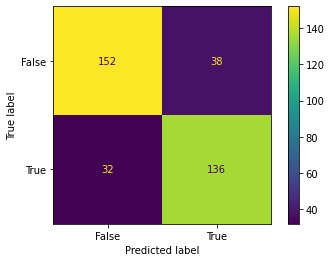

In [526]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

#### **Specificity and Sensitivity**

In [527]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
sensitifivity = tp / (tp+fn)

print('specificity: {0:.2f}%'.format(specificity * 100))
print('sensitivity: {0:.2f}%'.format(sensitifivity * 100))
print('Summation of sensitivity and specificity: {0:.2f}'.format(specificity + sensitifivity))

specificity: 80.00%
sensitivity: 80.95%
Summation of sensitivity and specificity: 1.61


#### **Accuracy**

In [528]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print('accuracy: {0:.2f}%'.format(accuracy * 100))

accuracy: 80.45%


# **Indvisual test**

In [ ]:
arr = []
for i in x_train_selected.columns:
  val = float(input(f"{i}: "))
  arr = arr + [val]
test = pd.DataFrame([arr], columns=x_train_selected.columns)
e = model.predict(test)
e